In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re 
import itertools
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_validate
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
dataset=pd.read_csv('review_cleaned')

#### delete useless column

In [3]:
dataset = dataset.drop(['Unnamed: 0'],axis = 1)
dataset.head()

,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type,rating_level,cleaned_review
0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5,We booked Grand Vin as our brunch location to ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,book grand vin brunch locat celebr wed day cou...
1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4,Sooooo for date night it was his turn to pick ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,sooooo date night turn pick random yelp select...
2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5,Adorable little wine bar with outdoor seating ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,ador littl wine bar outdoor seat avail wine ta...
3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,top hoboken well made pleasant atmospher make ...
4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5,Great space- service is on point - short rib ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,great space servic point short rib risotto cha...


#### creating the bag of words model###

In [4]:
dataset.dropna(axis=0, how='any',inplace=True)

In [5]:
score=[]
for i in dataset['restaurant_rating']:
    c=i[0]
    score.append(c)

In [6]:
dataset['restaurant_rating']=score

#### delete some data

In [7]:
dataset = dataset[dataset['user_text'].apply(lambda x: len(x.split())>=50)]

In [8]:
cv = CountVectorizer()
X = cv.fit_transform(dataset['cleaned_review']).toarray()
y = dataset.iloc[:, 8].values

#### set training set and test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [11]:
classifier = LogisticRegression(random_state = 0, C=0.01)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy_logistic = cm.trace()/cm.sum()

In [17]:
accuracy_logistic

0.82042158968850698

In [18]:
classifier = LogisticRegression(random_state = 0, C=0.001)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm
accuracy_logistic = cm.trace()/cm.sum()
accuracy_logistic

0.78558002148227712

In [20]:
classifier = LogisticRegression(random_state = 0, C=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [21]:
cm = confusion_matrix(y_test, y_pred)
accuracy_logistic = cm.trace()/cm.sum()
accuracy_logistic

0.83545918367346939

In [22]:
classifier = LogisticRegression(random_state = 0, C=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [23]:
cm = confusion_matrix(y_test, y_pred)
accuracy_logistic = cm.trace()/cm.sum()
accuracy_logistic

0.8253222341568206

In [24]:
classifier = LogisticRegression(random_state = 0, C=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [25]:
cm = confusion_matrix(y_test, y_pred)
accuracy_logistic = cm.trace()/cm.sum()
accuracy_logistic

0.82042158968850698

In [26]:
classifier = LogisticRegression(random_state = 0, C=0.1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [27]:
cm = confusion_matrix(y_test, y_pred)
accuracy_logistic = cm.trace()/cm.sum()
accuracy_logistic

0.83485499462943069

### Summary: 
#### As compared, the best score is 84%, and the best parameters is c=1

In [28]:
classifier = LogisticRegression(random_state = 0, C=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_logistic = cm.trace()/cm.sum()
accuracy_logistic

0.83545918367346939

In [ ]:
cm

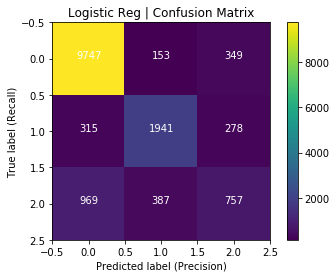

In [76]:
plt.imshow(cm, interpolation = 'nearest')

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Reg | Confusion Matrix')
plt.colorbar()
plt.show()

### Random Forest(after deleting)

In [52]:
cv = CountVectorizer()
X = cv.fit_transform(dataset['cleaned_review']).toarray()
y = dataset.iloc[:, 8].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [56]:
cm = confusion_matrix(y_test, y_pred)
accuracy = cm.trace()/cm.sum()
accuracy

0.75850498648522691

###  Naive Bayes¶

In [10]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, y_pred)
NBaccuracy = cm.trace()/cm.sum()
NBaccuracy

0.36890670146332372

### Summary:
### 1. The logistic regression has the best score(84%)
### 2. The naive bayes has the worse score(37%)

###  Now, i want to do sentiment analysis, to increase accuracy

In [8]:
train_data = np.array(dataset['cleaned_review'])
train_review_list = train_data.tolist()

In [9]:
len(train_review_list)

53641

In [10]:
import nltk

In [38]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/heli/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
neg=[]
pos=[]
neu=[]
compound=[]
sid = SentimentIntensityAnalyzer()
for sentence in train_review_list:
    ss = sid.polarity_scores(sentence)
    neg.append(ss['neg'])
    pos.append(ss['pos'])
    neu.append(ss['neu'])
    compound.append(ss['compound'])

In [17]:
dataset['neg']=neg
dataset['pos']=pos
dataset['neu']=neu
dataset['compound']=compound
dataset

,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type,rating_level,cleaned_review,neg,pos,neu,compound
0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5,We booked Grand Vin as our brunch location to ...,Grand Vin,4,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,book grand vin brunch locat celebr wed day cou...,0.000,0.225,0.775,0.9565
1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4,Sooooo for date night it was his turn to pick ...,Grand Vin,4,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,sooooo date night turn pick random yelp select...,0.028,0.195,0.777,0.9705
2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5,Adorable little wine bar with outdoor seating ...,Grand Vin,4,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,ador littl wine bar outdoor seat avail wine ta...,0.000,0.288,0.712,0.9709
3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,top hoboken well made pleasant atmospher make ...,0.000,0.375,0.625,0.9274
4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5,Great space- service is on point - short rib ...,Grand Vin,4,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,great space servic point short rib risotto cha...,0.055,0.308,0.638,0.9022
5,a5KJFFLBMoEpU7Bogn8YdQ,Nicole C.,4,beautifully decorated wine bar with delicious ...,Grand Vin,4,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,beauti decor wine bar delici servic mediocr ex...,0.067,0.166,0.767,0.7351
6,VG-EfMnPKHKHhEQZIWv1zQ,Kelly V.,3,"We were there today, for brunch. Very disappoi...",Grand Vin,4,$$,"Wine, Bars,, Italian,, Cocktail, Bars",mid,today brunch disappoint mean aw expect someth ...,0.060,0.193,0.747,0.9403
7,y_LETSyVwMVKbMSHwHDioQ,Erin A.,3,"I am feeling more 3 and 1/2 stars here, so let...",Grand Vin,4,$$,"Wine, Bars,, Italian,, Cocktail, Bars",mid,feel star let imagin far away popular hoboken ...,0.053,0.361,0.586,0.9896
9,ZZELut-m0rSyivf8saCMKA,Mark S.,4,It certainly wasn't easy...When the better hal...,Grand Vin,4,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,certainli easi better half offer take dinner a...,0.000,0.174,0.826,0.9509
10,fbhRFckDkMOCZFSxpOM4xA,Kimberly M.,5,Had a really fun first visit here during the f...,Grand Vin,4,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,fun first visit first hoboken snow season bart...,0.000,0.435,0.565,0.9565


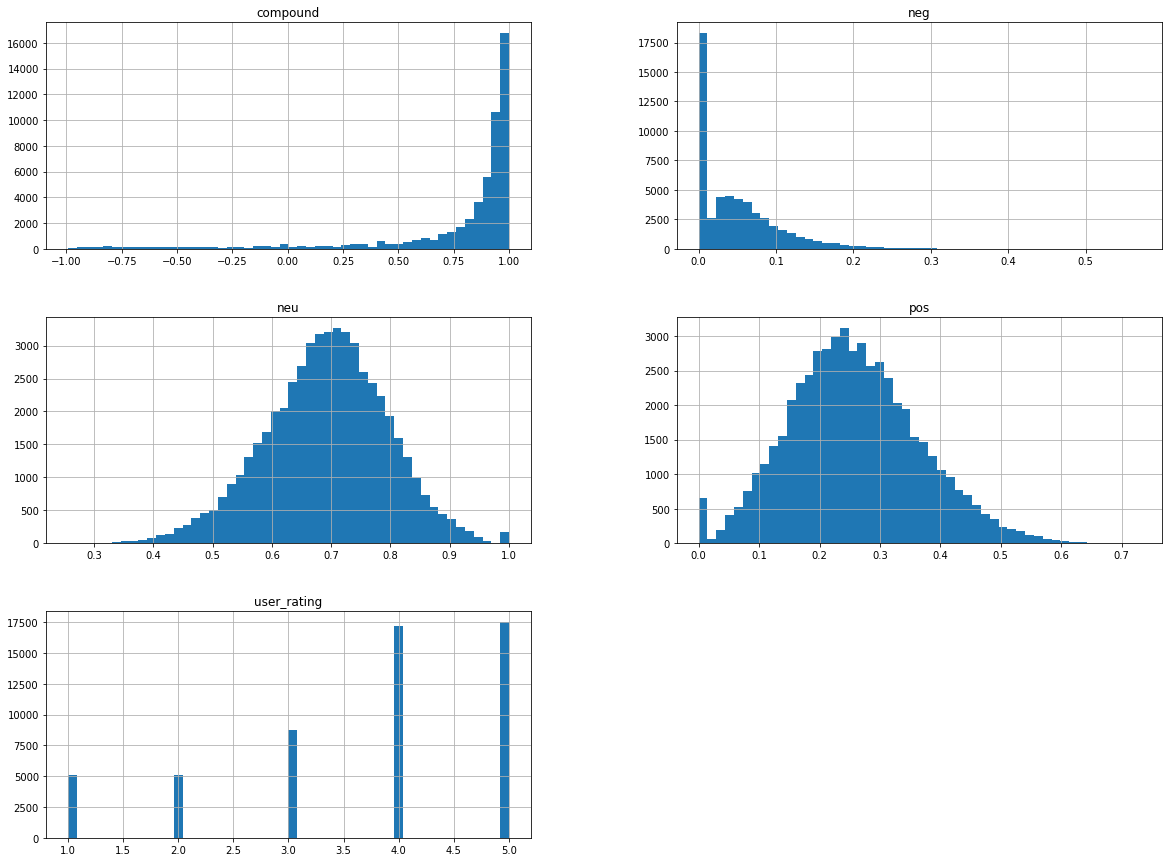

In [41]:
dataset.hist(bins=50,figsize=(20,15))
plt.show()

#### It seems like, this features are usefull

#### bag of words

In [12]:
cv = CountVectorizer()
X = cv.fit_transform(dataset['cleaned_review']).toarray()
y = dataset.iloc[:, 8].values

In [18]:
dataset_X = pd.DataFrame(X)

In [19]:
dataset_X['neg']=neg
dataset_X['pos']=pos
dataset_X['neu']=neu
dataset_X['compound']=compound

dataset_X.head(3)


,0,1,2,3,4,5,6,7,8,9,...,38203,38204,38205,38206,38207,38208,neg,pos,neu,compound
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.225,0.775,0.9565
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.028,0.195,0.777,0.9705
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.288,0.712,0.9709


In [20]:
X = dataset_X
y = dataset.iloc[:,8].values

In [21]:
y

array(['high', 'high', 'high', ..., 'high', 'low', 'low'], dtype=object)

In [22]:
from sklearn.model_selection import train_test_split             
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)    

In [23]:
y_train

array(['high', 'high', 'mid', ..., 'high', 'high', 'mid'], dtype=object)

In [23]:
classifier = LogisticRegression(random_state = 0, C=1)
classifier.fit(X_train, y_train)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
cm = confusion_matrix(y_test, y_pred)
accuracy_logistic = cm.trace()/cm.sum()
accuracy_logistic

0.81269107449108935

##### cause the data is pretty huge, the laptop cannot handle it, so i deleted some data, now try the logistic method, without sentiment analysis

In [46]:
cv = CountVectorizer()
X = cv.fit_transform(dataset['cleaned_review']).toarray()
y = dataset.iloc[:, 8].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
classifier = LogisticRegression(random_state = 0, C=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_logistic = cm.trace()/cm.sum()
accuracy_logistic

0.81321651598471434

#### we can find that sentiment analysis cannot help us to increase accuracy

#### now put out review in the bag of words, only use the sentiment words 

In [29]:
only_sen = dataset.iloc[:,10:14]

In [35]:
cv = CountVectorizer()
X = only_sen
y = dataset.iloc[:, 8].values

In [36]:
from sklearn.model_selection import train_test_split             
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)    

In [37]:
classifier = LogisticRegression(random_state = 0, C=1)
classifier.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
cm = confusion_matrix(y_test, y_pred)
accuracy_logistic = cm.trace()/cm.sum()
accuracy_logistic

0.68317053165312058


#### As we can see, user reviews are the most meaning during predicting rating part


### Randome Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [25]:
cm = confusion_matrix(y_test, y_pred)
RMaccuracy = cm.trace()/cm.sum()
RMaccuracy


0.75639400492133324

### Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [27]:
cm = confusion_matrix(y_test, y_pred)
NBaccuracy = cm.trace()/cm.sum()
NBaccuracy


0.37126239654015358

### After using sentiment analysis, we can find naive beyes accuracy increase 1%(36-37)